In [1]:
import numpy as np
import pandas as pd
from transformers import AutoTokenizer
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
tokenizer = AutoTokenizer.from_pretrained("google/mt5-base", use_fast=False)

You are using the legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This means that tokens that come after special tokens will not be properly handled. We recommend you to read the related pull request available at https://github.com/huggingface/transformers/pull/24565


In [3]:
cevent = pd.read_csv('./data/raw/new_summary_c_event.csv')
culture = pd.read_csv('./data/raw/new_summary_culture.csv')

In [4]:
total_data = pd.concat([cevent, culture])
total_data = total_data.reset_index()
total_data = total_data[['passage', 'summary']]
total_data

,passage,summary
0,자유한국당. 자한당인가? 그전에 새누리당. 그 세력이 보여준 태도가 전혀 국민의 탄...,통합당은 탄핵의 심판을 받은 당임에도 불구하고 반성이나 참회는커녕 탄핵 정권의 국무...
1,전부터 제가 204년도에 17대 총선 치를 때 그때 천막 치고 칠 때예요. 박근혜 ...,"17대 총선 당시부터 일부 당원이 매일 새벽 방문해 투표 조작 음모론을 제기했고, ..."
2,과연 그게 도움이 됐느냐 성찰해야 돼요. 시간이 많지 않아서 구체적인 사람 이야기 ...,미래통합당에서 안철수 대표를 영입해야 한다는 의견이 거론되고 있다. 아직 안철수 대...
3,저는 코멘트를 하지 않겠습니다. 저도 그 이상 말씀드리지 않겠습니다. 과거의 지도자...,보수는 미래형 지도자에게 필요한 덕목이 자유민주주의와 시장경제라고 말한다. 그러나 ...
4,조경태 의원께서는 지금 원내대표가 대행 체제로 가서 전당대회 때까지 가는 방식이 있...,비상대책위라는 것은 당이 비정상적인 상황으로 이어지는 것이니 당원들이나 지지자들이 ...
...,...,...
11661,역사의 커다란 물줄기가 바뀐 결정적 하루 역사가 움직인 터닝 포인트를 입체적으로 구...,"역사저널, 그날에서는 15세기 유렵 신항로 개척에 관한 대항해 시대 1회 포르투갈,..."
11662,위대한 생존자들 야생의 거구들 1. 거친 야생에서 기발한 전략과 적응을 통해 살아남...,"동물의 왕국, 위대한 생존자들 야생의 거구들 1편에서는 거대한 몸집을 가진 동물들이..."
11663,배우 박혜수가 3.1운동 10주년 기획 윤동주 콘서트 별 헤는 밤과 뜻을 함께합니다...,배우 박혜수가 3.1운동 10주년 기획 윤동주 콘서트 별 헤는 밤과 함께한다. 별 ...
11664,배우 남상미가 KBS와 민족 화해 협력 범국민 협의회가 공동 주최하는 2019 평화...,주최 측은 배우 남상미가 18일 KBS 홀에서 열릴 2019 평화 음악회 꿈을 꾸다...


In [5]:
train_data, valid_data = train_test_split(total_data, test_size=0.1, random_state=42)

In [7]:
train_data.to_csv('./data/v1/train.csv', index=False)
valid_data.to_csv('./data/v1/eval.csv', index=False)

In [8]:
train_data = pd.read_csv('./data/v1/train.csv')
valid_data = pd.read_csv('./data/v1/eval.csv')

In [28]:
passage_lengths = []
summary_lengths = []
for idx, td in total_data.iterrows():
    passage_tokens = tokenizer(td["passage"], return_tensors='pt')
    summary_tokens = tokenizer(td["summary"], return_tensors='pt')

    passage_lengths.append(len(passage_tokens["input_ids"][0]))
    summary_lengths.append(len(summary_tokens["input_ids"][0]))

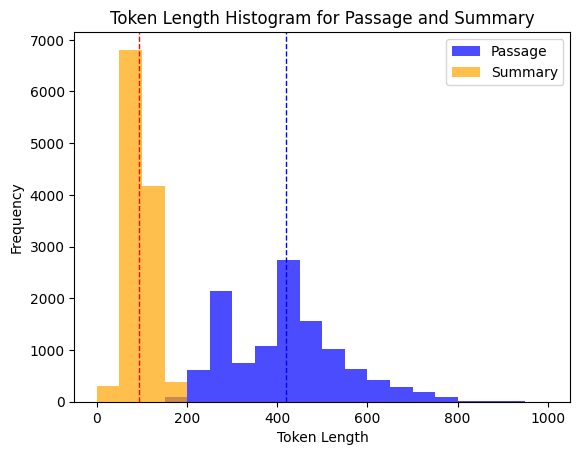

In [30]:
# 토큰 길이 히스토그램
plt.hist(passage_lengths, bins=20, range=(0, 1000), alpha=0.7, color="blue", label="Passage")
plt.axvline(sum(passage_lengths) / len(passage_lengths), color='b', linestyle='dashed', linewidth=1)

plt.hist(summary_lengths, bins=20, range=(0, 1000), alpha=0.7, color="orange", label="Summary")
plt.axvline(sum(summary_lengths) / len(summary_lengths), color='r', linestyle='dashed', linewidth=1)

plt.xlabel('Token Length')
plt.ylabel('Frequency')
plt.legend()
plt.title('Token Length Histogram for Passage and Summary')
plt.show()

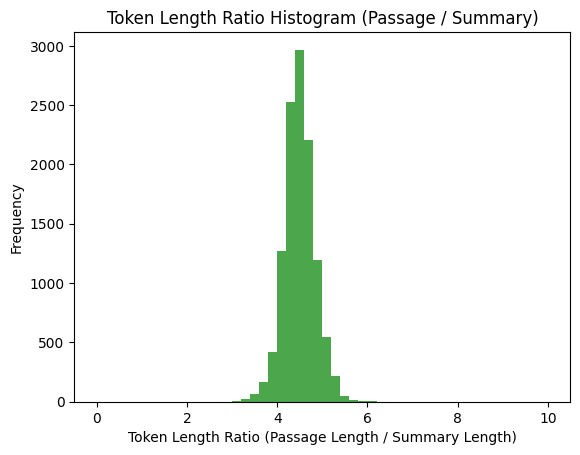

In [31]:
token_length_ratio = [
    passage_len / summary_len for passage_len, summary_len in zip(passage_lengths, summary_lengths)
]
plt.hist(token_length_ratio, bins=50, range=(0, 10), alpha=0.7, color="green")
plt.xlabel('Token Length Ratio (Passage Length / Summary Length)')
plt.ylabel('Frequency')
plt.title('Token Length Ratio Histogram (Passage / Summary)')
plt.show()

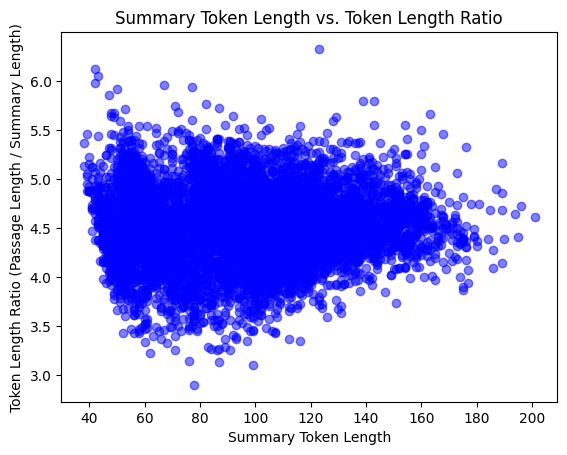

In [41]:
plt.scatter(summary_lengths, token_length_ratio, alpha=0.5, color="blue")
plt.xlabel('Summary Token Length')
plt.ylabel('Token Length Ratio (Passage Length / Summary Length)')
plt.title('Summary Token Length vs. Token Length Ratio')
plt.show()

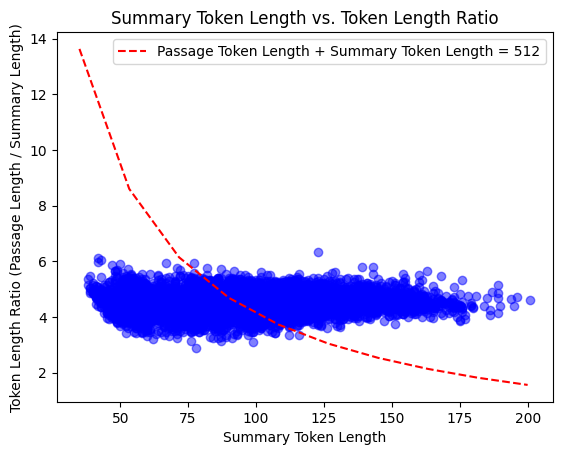

In [40]:
plt.scatter(summary_lengths, token_length_ratio, alpha=0.5, color="blue")
plt.xlabel('Summary Token Length')
plt.ylabel('Token Length Ratio (Passage Length / Summary Length)')
plt.title('Summary Token Length vs. Token Length Ratio')
x = np.linspace(35, 200, 10)
y = 512/x - 1
plt.plot(x, y, 'r--', label='Passage Token Length + Summary Token Length = 512')
plt.legend()
plt.show()

In [8]:
def count_tokens(text):
    return len(tokenizer(text)['input_ids'])

max_allowed_tokens = 512
num_passages_below_threshold = sum(
    1 for idx, passage in total_data.passage.items() if count_tokens(passage) <= max_allowed_tokens
)

print(f"Passages with 512 or fewer tokens: {num_passages_below_threshold}")

Passages with 512 or fewer tokens: 9335


In [9]:
max_allowed_tokens = 512
short_train = train_data[train_data["passage"].apply(count_tokens) <= max_allowed_tokens]
short_valid = valid_data[valid_data["passage"].apply(count_tokens) <= max_allowed_tokens]
print(f"Train passages with 512 or fewer tokens: {len(short_train)}")
print(f"Train passages with 512 or fewer tokens: {len(short_valid)}")

Train passages with 512 or fewer tokens: 8423
Train passages with 512 or fewer tokens: 912


In [11]:
short_train.to_csv("./data/v2_short/train_short.csv", index=False)
short_valid.to_csv("./data/v2_short/eval_short.csv", index=False)